In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
# Load Data
df = pd.read_csv('DataEmg.csv')
df

EC No District Name Tehsil Name  Agent Id          Agent Name  \
0      137952        Gujrat     Kharian  R-GRT-84         Faisal Aziz   
1      137953        Gujrat      Gujrat  R-GRT-94  Muhammad Imran Ali   
2      137954        Gujrat      Gujrat  R-GRT-94  Muhammad Imran Ali   
3      137955        Gujrat      Gujrat  R-GRT-92       Ansar Hussain   
4      137956        Gujrat      Gujrat  R-GRT-94  Muhammad Imran Ali   
...       ...           ...         ...       ...                 ...   
44412  173442        Gujrat      Gujrat    DR-692       Zubair Rasool   
44413  173442        Gujrat      Gujrat    DR-692       Zubair Rasool   
44414  173442        Gujrat      Gujrat    DR-692       Zubair Rasool   
44415  173442        Gujrat      Gujrat    DR-692       Zubair Rasool   
44416  173442        Gujrat      Gujrat    DR-692       Zubair Rasool   

        Caller Name  Caller Number  Call Type     Emergency Type  \
0               Ali     3125804557  EMDS Call  Medical Emergency   
1          hamayoon     3465769611  EMDS Call  Medical Emergency   
2      ehtisham ali     3130627900  EMDS Call  Medical Emergency   
3       awais akram     3136222042  EMDS Call                RTA   
4          ali shan     3060030823  EMDS Call  Medical Emergency   
...             ...            ...        ...                ...   
44412           ALI     3035347055  EMDS Call      Miscellaneous   
44413           ALI     3035347055  EMDS Call      Miscellaneous   
44414           ALI     3035347055  EMDS Call      Miscellaneous   
44415           ALI     3035347055  EMDS Call      Miscellaneous   
44416           ALI     3035347055  EMDS Call      Miscellaneous   

         Emergency Subtype  ... Belongings handed over to Clinical Diagnosis  \
0               Chest Pain  ...                       Nil                NaN   
1               SOB/Asthma  ...                       Nil                NaN   
2               High Fever  ...                        No                NaN   
3                      NaN  ...                       NaN                NaN   
4                   Others  ...                       NaN                NaN   
...                    ...  ...                       ...                ...   
44412  Mass Event Coverage  ...                       NaN                NaN   
44413  Mass Event Coverage  ...                       NaN                NaN   
44414  Mass Event Coverage  ...                       NaN                NaN   
44415  Mass Event Coverage  ...                       NaN                NaN   
44416  Mass Event Coverage  ...                       NaN                NaN   

      Treatment Provided            Address Suggestion & Comments  \
0                    NaN  Mohala Badrud din                   NaN   
1                    NaN                Jpj                    No   
2                    NaN  Phularwan village                  Nill   
3                    NaN         Staff gala                   NaN   
4                    NaN        Madni hotel                   NaN   
...                  ...                ...                   ...   
44412                NaN           Faizabad                  Good   
44413                NaN        Sardar pura                  Good   
44414                NaN          Wazirabad                  Good   
44415                NaN        Sardar pura                  Good   
44416                NaN             Gujrat                  Good   

      Incident Images Count  \
0                         3   
1                         1   
2                         3   
3                         2   
4                         1   
...                     ...   
44412                   209   
44413                   209   
44414                   209   
44415                   209   
44416                   209   

      Blood Pressure (mmHg) SYS / DIA | Pulse (min) | Temperature (F) | Respiratory Rate | General Condition | Time & Date  \
0      160/100 | 110 | 98

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44417 entries, 0 to 44416
Data columns (total 55 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   EC No                                                                                                                 44417 non-null  object 
 1   District Name                                                                                                         44417 non-null  object 
 2   Tehsil Name                                                                                                           44416 non-null  object 
 3   Agent Id                                                                                                              44417 non-null  object 
 4   Agen

In [5]:
# Select suitable features
df = df[['EC No', 'Emergency Type','Emergency Subtype','Dispatched Vehicles', 'Vehicle Reg No | Acknowledge | Dispatched | OnLocation | Finished At','Response Time (HH:MM:SS)', 'Incident LatLng', 'Dispatched Vehicles Type'  ]]

In [5]:
df

EC No     Emergency Type    Emergency Subtype  \
0      137952  Medical Emergency           Chest Pain   
1      137953  Medical Emergency           SOB/Asthma   
2      137954  Medical Emergency           High Fever   
3      137955                RTA                  NaN   
4      137956  Medical Emergency               Others   
...       ...                ...                  ...   
44412  173442      Miscellaneous  Mass Event Coverage   
44413  173442      Miscellaneous  Mass Event Coverage   
44414  173442      Miscellaneous  Mass Event Coverage   
44415  173442      Miscellaneous  Mass Event Coverage   
44416  173442      Miscellaneous  Mass Event Coverage   

                                     Dispatched Vehicles  \
0                                                 KHA-02   
1                                                 GTA-09   
2                                                 GTA-05   
3                                                 GTA-03   
4                                                 GTA-04   
...                                                  ...   
44412  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44413  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44414  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44415  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44416  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   

      Vehicle Reg No | Acknowledge | Dispatched | OnLocation | Finished At  \
0      KHA-02 | 2023-01-01 00:12:44 | 2023-01-01 00:1...                     
1      GTA-09 | 2023-01-01 00:28:25 | 2023-01-01 00:2...                     
2      GTA-05 | 2023-01-01 01:44:58 | 2023-01-01 01:4...                     
3      GTA-03 | 2023-01-01 01:46:56 | 2023-01-01 01:4...                     
4      GTA-04 | 2023-01-01 02:20:03 | 2023-01-01 02:2...                     
...                                                  ...                     
44412  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44413  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44414  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44415  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44416  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     

      Response Time (HH:MM:SS)                      Incident LatLng  \
0                      0:07:22                   32.59241,74.046685   
1                      0:03:24                   32.59241,74.046685   
2                      0:05:14                   32.59241,74.046685   
3                      0:06:24                   32.59241,74.046685   
4                      0:10:45                   32.59241,74.046685   
...                        ...                                  ...   
44412                  0:00:13  32.57271031356825,74.08184051513673   
44413                  0:00:13  32.57271031356825,74.08184051513673   
44414                  0:00:13  32.57271031356825,74.08184051513673   
44415                  0:00:13  32.57271031356825,74.08184051513673   
44416                  0:00:13  32.57271031356825,74.08184051513673   

       Dispatched Vehicles Type  
0                     ambulance  
1                     ambulance  
2                     ambulance  
3                     ambulance  
4                     ambulance  
...                         ...  
44412  ambulance,bike,firetruck  
44413  ambulance,bike,firetruck  
44414  ambulance,bike,firetruck  
44415  ambulance,bike,firetruck  
44416  ambulance,bike,firetruck  

[44417 rows x 8 columns]

In [6]:
# split the Name column into two columns
df[['Latitude', 'Longitude']] = df['Incident LatLng'].str.split(',', expand=True)

/home/muhammad/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [7]:
# Split the column into exactly five columns and handle errors
# `expand=True` is used to create separate columns from each split part
df[['Vehicle Reg No', 'Acknowledge', 'Dispatched', 'OnLocation', 'Finished At']] = df['Vehicle Reg No | Acknowledge | Dispatched | OnLocation | Finished At'].str.split('|', expand=True, n=4)


In [8]:
df

EC No     Emergency Type    Emergency Subtype  \
0      137952  Medical Emergency           Chest Pain   
1      137953  Medical Emergency           SOB/Asthma   
2      137954  Medical Emergency           High Fever   
3      137955                RTA                  NaN   
4      137956  Medical Emergency               Others   
...       ...                ...                  ...   
44412  173442      Miscellaneous  Mass Event Coverage   
44413  173442      Miscellaneous  Mass Event Coverage   
44414  173442      Miscellaneous  Mass Event Coverage   
44415  173442      Miscellaneous  Mass Event Coverage   
44416  173442      Miscellaneous  Mass Event Coverage   

                                     Dispatched Vehicles  \
0                                                 KHA-02   
1                                                 GTA-09   
2                                                 GTA-05   
3                                                 GTA-03   
4                                                 GTA-04   
...                                                  ...   
44412  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44413  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44414  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44415  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44416  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   

      Vehicle Reg No | Acknowledge | Dispatched | OnLocation | Finished At  \
0      KHA-02 | 2023-01-01 00:12:44 | 2023-01-01 00:1...                     
1      GTA-09 | 2023-01-01 00:28:25 | 2023-01-01 00:2...                     
2      GTA-05 | 2023-01-01 01:44:58 | 2023-01-01 01:4...                     
3      GTA-03 | 2023-01-01 01:46:56 | 2023-01-01 01:4...                     
4      GTA-04 | 2023-01-01 02:20:03 | 2023-01-01 02:2...                     
...                                                  ...                     
44412  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44413  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44414  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44415  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44416  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     

      Response Time (HH:MM:SS)                      Incident LatLng  \
0                      0:07:22                   32.59241,74.046685   
1                      0:03:24                   32.59241,74.046685   
2                      0:05:14                   32.59241,74.046685   
3                      0:06:24                   32.59241,74.046685   
4                      0:10:45                   32.59241,74.046685   
...                        ...                                  ...   
44412                  0:00:13  32.57271031356825,74.08184051513673   
44413                  0:00:13  32.57271031356825,74.08184051513673   
44414                  0:00:13  32.57271031356825,74.08184051513673   
44415                  0:00:13  32.57271031356825,74.08184051513673   
44416                  0:00:13  32.57271031356825,74.08184051513673   

       Dispatched Vehicles Type           Latitude          Longitude  \
0                     ambulance           32.59241          74.046685   
1                     ambulance           32.59241          74.046685   
2                     ambulance           32.59241          74.046685   
3                     ambulance           32.59241          74.046685   
4                     ambulance           32.59241          74.046685   
...                         ...                ...                ...   
44412  ambulance,bike,firetruck  32.57271031356825  74.08184051513673   
44413  ambulance,bike,firetruck  32.57271031356825  74.08184051513673   
44414  ambulance,bike,firetruck  32.57271031356825  74.08184051513673   
44415  ambulance,bike,firetruck  32.57271031356825  74.08184051513673   
44416  am

In [6]:
# Drop Column
df = df.drop(columns='Incident LatLng')
df

EC No     Emergency Type    Emergency Subtype  \
0      137952  Medical Emergency           Chest Pain   
1      137953  Medical Emergency           SOB/Asthma   
2      137954  Medical Emergency           High Fever   
3      137955                RTA                  NaN   
4      137956  Medical Emergency               Others   
...       ...                ...                  ...   
44412  173442      Miscellaneous  Mass Event Coverage   
44413  173442      Miscellaneous  Mass Event Coverage   
44414  173442      Miscellaneous  Mass Event Coverage   
44415  173442      Miscellaneous  Mass Event Coverage   
44416  173442      Miscellaneous  Mass Event Coverage   

                                     Dispatched Vehicles  \
0                                                 KHA-02   
1                                                 GTA-09   
2                                                 GTA-05   
3                                                 GTA-03   
4                                                 GTA-04   
...                                                  ...   
44412  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44413  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44414  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44415  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44416  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   

      Vehicle Reg No | Acknowledge | Dispatched | OnLocation | Finished At  \
0      KHA-02 | 2023-01-01 00:12:44 | 2023-01-01 00:1...                     
1      GTA-09 | 2023-01-01 00:28:25 | 2023-01-01 00:2...                     
2      GTA-05 | 2023-01-01 01:44:58 | 2023-01-01 01:4...                     
3      GTA-03 | 2023-01-01 01:46:56 | 2023-01-01 01:4...                     
4      GTA-04 | 2023-01-01 02:20:03 | 2023-01-01 02:2...                     
...                                                  ...                     
44412  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44413  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44414  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44415  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     
44416  GTA-02 | 2024-07-17 08:53:57 | 2024-07-17 09:1...                     

      Response Time (HH:MM:SS)  Dispatched Vehicles Type  
0                      0:07:22                 ambulance  
1                      0:03:24                 ambulance  
2                      0:05:14                 ambulance  
3                      0:06:24                 ambulance  
4                      0:10:45                 ambulance  
...                        ...                       ...  
44412                  0:00:13  ambulance,bike,firetruck  
44413                  0:00:13  ambulance,bike,firetruck  
44414                  0:00:13  ambulance,bike,firetruck  
44415                  0:00:13  ambulance,bike,firetruck  
44416                  0:00:13  ambulance,bike,firetruck  

[44417 rows x 7 columns]

In [10]:
df = df.drop(columns='Vehicle Reg No | Acknowledge | Dispatched | OnLocation | Finished At')
df

EC No     Emergency Type    Emergency Subtype  \
0      137952  Medical Emergency           Chest Pain   
1      137953  Medical Emergency           SOB/Asthma   
2      137954  Medical Emergency           High Fever   
3      137955                RTA                  NaN   
4      137956  Medical Emergency               Others   
...       ...                ...                  ...   
44412  173442      Miscellaneous  Mass Event Coverage   
44413  173442      Miscellaneous  Mass Event Coverage   
44414  173442      Miscellaneous  Mass Event Coverage   
44415  173442      Miscellaneous  Mass Event Coverage   
44416  173442      Miscellaneous  Mass Event Coverage   

                                     Dispatched Vehicles  \
0                                                 KHA-02   
1                                                 GTA-09   
2                                                 GTA-05   
3                                                 GTA-03   
4                                                 GTA-04   
...                                                  ...   
44412  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44413  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44414  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44415  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   
44416  GTA-02, GTA-03, GTB-06, GTB-07, GTB-08, GTB-11...   

      Response Time (HH:MM:SS)  Dispatched Vehicles Type           Latitude  \
0                      0:07:22                 ambulance           32.59241   
1                      0:03:24                 ambulance           32.59241   
2                      0:05:14                 ambulance           32.59241   
3                      0:06:24                 ambulance           32.59241   
4                      0:10:45                 ambulance           32.59241   
...                        ...                       ...                ...   
44412                  0:00:13  ambulance,bike,firetruck  32.57271031356825   
44413                  0:00:13  ambulance,bike,firetruck  32.57271031356825   
44414                  0:00:13  ambulance,bike,firetruck  32.57271031356825   
44415                  0:00:13  ambulance,bike,firetruck  32.57271031356825   
44416                  0:00:13  ambulance,bike,firetruck  32.57271031356825   

               Longitude Vehicle Reg No            Acknowledge  \
0              74.046685        KHA-02    2023-01-01 00:12:44    
1              74.046685        GTA-09    2023-01-01 00:28:25    
2              74.046685        GTA-05    2023-01-01 01:44:58    
3              74.046685        GTA-03    2023-01-01 01:46:56    
4              74.046685        GTA-04    2023-01-01 02:20:03    
...                  ...            ...                    ...   
44412  74.08184051513673        GTA-02    2024-07-17 08:53:57    
44413  74.08184051513673        GTA-02    2024-07-17 08:53:57    
44414  74.08184051513673        GTA-02    2024-07-17 08:53:57    
44415  74.08184051513673        GTA-02    2024-07-17 08:53:57    
44416  74.08184051513673        GTA-02    2024-07-17 08:53:57    

                  Dispatched             OnLocation  \
0       2023-01-01 00:13:11    2023-01-01 00:20:06    
1       2023-01-01 00:28:30    2023-01-01 00:31:49    
2       2023-01-01 01:45:07    2023-01-01 01:50:12    
3       2023-01-01 01:47:35    2023-01-01 01:53:20    
4       2023-01-01 02:21:22    2023-01-01 02:30:48    
...                      ...                    ...   
44412   2024-07-17 09:14:44    2024-07-17 09:14:47    
44413   2024-07-17 09:14:44    2024-07-17 09:14:47    
44414   2024-07-17 09:14:44    2024-07-17 09:14:47    
44415   2024-07-17 09:14:44    2024-07-17 09:14:47    
44416   2024-07-17 09:14:44    2024-07-17 09:14:47    

                                             Finished At  
0                                    2023-01-01 01:02:33  
1                                    2023-01-01 01:16:38  
2                     

In [11]:
#df['Emergency Type'].tolist()

In [12]:
# list of active subscription statuses
active_statuses = ['Medical Emergency', 'RTA']

In [13]:
# select rows where the 'Emergency Type' column is (activates_status)
df = df.loc[df['Emergency Type'].isin(active_statuses)]
df

EC No     Emergency Type Emergency Subtype Dispatched Vehicles  \
0      137952  Medical Emergency        Chest Pain              KHA-02   
1      137953  Medical Emergency        SOB/Asthma              GTA-09   
2      137954  Medical Emergency        High Fever              GTA-05   
3      137955                RTA               NaN              GTA-03   
4      137956  Medical Emergency            Others              GTA-04   
...       ...                ...               ...                 ...   
43668  173508  Medical Emergency    Abdominal Pain              GTA-12   
43702  173510  Medical Emergency            Others      GTA-02, GTB-23   
43704  173512  Medical Emergency            Others              GTB-16   
44271  173451  Medical Emergency       Unconscious              GTA-01   
44316  173453  Medical Emergency            Others              GTA-01   

      Response Time (HH:MM:SS) Dispatched Vehicles Type            Latitude  \
0                      0:07:22                ambulance            32.59241   
1                      0:03:24                ambulance            32.59241   
2                      0:05:14                ambulance            32.59241   
3                      0:06:24                ambulance            32.59241   
4                      0:10:45                ambulance            32.59241   
...                        ...                      ...                 ...   
43668                  0:03:16                ambulance            32.59241   
43702                  0:11:31           ambulance,bike            32.59241   
43704                  0:00:33                     bike            32.59241   
44271                  0:10:52                ambulance  32.627639718889895   
44316                  0:09:46                ambulance            32.59241   

               Longitude Vehicle Reg No            Acknowledge  \
0              74.046685        KHA-02    2023-01-01 00:12:44    
1              74.046685        GTA-09    2023-01-01 00:28:25    
2              74.046685        GTA-05    2023-01-01 01:44:58    
3              74.046685        GTA-03    2023-01-01 01:46:56    
4              74.046685        GTA-04    2023-01-01 02:20:03    
...                  ...            ...                    ...   
43668          74.046685        GTA-12    2024-07-18 09:38:43    
43702          74.046685        GTA-02    2024-07-18 10:28:02    
43704          74.046685        GTB-16    2024-07-18 10:02:15    
44271  74.10020828247072        GTA-01    2024-07-17 08:56:45    
44316          74.046685        GTA-01    2024-07-17 10:17:48    

                  Dispatched             OnLocation  \
0       2023-01-01 00:13:11    2023-01-01 00:20:06    
1       2023-01-01 00:28:30    2023-01-01 00:31:49    
2       2023-01-01 01:45:07    2023-01-01 01:50:12    
3       2023-01-01 01:47:35    2023-01-01 01:53:20    
4       2023-01-01 02:21:22    2023-01-01 02:30:48    
...                      ...                    ...   
43668   2024-07-18 09:38:53    2024-07-18 09:41:59    
43702   2024-07-18 10:28:16    2024-07-18 10:39:46    
43704   2024-07-18 10:02:40    2024-07-18 10:02:48    
44271   2024-07-17 08:57:10    2024-07-17 09:07:37    
44316   2024-07-17 10:19:53    2024-07-17 10:27:34    

                                             Finished At  
0                                    2023-01-01 01:02:33  
1                                    2023-01-01 01:16:38  
2                                    2023-01-01 02:30:56  
3                                    2023-01-01 02:53:53  
4                                    2023-01-01 03:08:30  
...                                                  ...  
43668                                2024-07-18 09:57:10  
43702   2024-07-18 12:02:33, GTB-23 | 2024-07-18 09:4...  
43704                                2024-07-18 10:45:30  
44271                                2024-07-17 09:48:06  
44316                                2024-07-17 11:27:02  

[30245 

In [14]:
# select rows where the 'Emergency Type' column is (activates_status)
df = df.loc[df['Dispatched Vehicles Type'].isin(['bike','ambulance,bike'])]
df

EC No     Emergency Type Emergency Subtype     Dispatched Vehicles  \
18     137967  Medical Emergency          Epilepsy          GTB-07, GTB-20   
19     137968                RTA               NaN          GTB-04, GTB-06   
22     137971                RTA               NaN          GTB-04, GTB-06   
23     137972                RTA               NaN  GTA-01, GTB-11, GTB-16   
25     137974  Medical Emergency        SOB/Asthma  GTA-02, GTB-08, GTB-09   
...       ...                ...               ...                     ...   
43662  173503  Medical Emergency            Others          GTB-28, KHA-03   
43666  173507                RTA               NaN          GTB-11, KHA-02   
43667  173507                RTA               NaN          GTB-11, KHA-02   
43702  173510  Medical Emergency            Others          GTA-02, GTB-23   
43704  173512  Medical Emergency            Others                  GTB-16   

      Response Time (HH:MM:SS) Dispatched Vehicles Type           Latitude  \
18                     0:02:50                     bike           32.59241   
19                     0:02:38                     bike           32.59241   
22                     0:02:02                     bike           32.59241   
23                     0:05:23           ambulance,bike           32.59241   
25                     0:05:19           ambulance,bike           32.59241   
...                        ...                      ...                ...   
43662                  0:00:51           ambulance,bike  32.56224139958791   
43666                  0:14:33           ambulance,bike           32.59241   
43667                  0:14:33           ambulance,bike           32.59241   
43702                  0:11:31           ambulance,bike           32.59241   
43704                  0:00:33                     bike           32.59241   

               Longitude Vehicle Reg No            Acknowledge  \
18             74.046685        GTB-07    2023-01-01 10:21:19    
19             74.046685        GTB-04    2023-01-01 10:26:09    
22             74.046685        GTB-04    2023-01-01 11:22:11    
23             74.046685        GTA-01    2023-01-01 11:32:11    
25             74.046685        GTA-02    2023-01-01 12:14:50    
...                  ...            ...                    ...   
43662  74.07883644104005        GTB-28    2024-07-18 09:15:06    
43666          74.046685        GTB-11    2024-07-18 09:34:55    
43667          74.046685        GTB-11    2024-07-18 09:34:55    
43702          74.046685        GTA-02    2024-07-18 10:28:02    
43704          74.046685        GTB-16    2024-07-18 10:02:15    

                  Dispatched             OnLocation  \
18      2023-01-01 10:21:45    2023-01-01 10:24:09    
19      2023-01-01 10:26:22    2023-01-01 10:28:47    
22      2023-01-01 11:22:20    2023-01-01 11:25:16    
23      2023-01-01 11:32:23    2023-01-01 11:39:33    
25      2023-01-01 12:15:04    2023-01-01 12:19:52    
...                      ...                    ...   
43662   2024-07-18 09:15:17    2024-07-18 09:15:57    
43666                   N/A                    N/A    
43667                   N/A                    N/A    
43702   2024-07-18 10:28:16    2024-07-18 10:39:46    
43704   2024-07-18 10:02:40    2024-07-18 10:02:48    

                                             Finished At  
18      2023-01-01 10:34:50, GTB-20 | 2023-01-01 10:2...  
19      2023-01-01 10:56:04, GTB-06 | 2023-01-01 10:2...  
22      2023-01-01 11:55:59, GTB-06 | 2023-01-01 11:2...  
23      2023-01-01 12:16:50, GTB-11 | 2023-01-01 11:2...  
25      2023-01-01 12:47:02, GTB-08 | 2023-01-01 11:5...  
...                                                  ...  
43662   2024-07-18 10:04:06, KHA-03 | 2024-07-18 09:3...  
43666   2024-07-18 09:40:05, KHA-02 | 2024-07-18 09:3...  
43667   2024-07-18 09:40:05, KHA-02 | 2024-07-18 09:3...  
43702   2024-07-18 12:02:33, GTB-23 | 2024-07-18 09:4...  
43704                          

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12387 entries, 18 to 43704
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EC No                     12387 non-null  object
 1   Emergency Type            12387 non-null  object
 2   Emergency Subtype         6336 non-null   object
 3   Dispatched Vehicles       12387 non-null  object
 4   Response Time (HH:MM:SS)  12311 non-null  object
 5   Dispatched Vehicles Type  12387 non-null  object
 6   Latitude                  12387 non-null  object
 7   Longitude                 12387 non-null  object
 8   Vehicle Reg No            12387 non-null  object
 9   Acknowledge               12387 non-null  object
 10  Dispatched                12387 non-null  object
 11  OnLocation                12387 non-null  object
 12  Finished At               12387 non-null  object
dtypes: object(13)
memory usage: 1.3+ MB


In [16]:
# Handle missing values
df.dropna(inplace=True)  # Drop rows with missing values

# Convert data types
df['Response Time (HH:MM:SS)'] = pd.to_datetime(df['Response Time (HH:MM:SS)'])

# Format date and time
df['Response Hour'] = df['Response Time (HH:MM:SS)'].dt.hour
df['Response Minute'] = df['Response Time (HH:MM:SS)'].dt.minute
df['Response Second'] = df['Response Time (HH:MM:SS)'].dt.second

# Create additional columns
df['Response Time (Seconds)'] = df['Response Hour'] * 3600 + df['Response Minute'] * 60 + df['Response Second']

/home/muhammad/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_9769/3656674031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Response Time (HH:MM:SS)'] = pd.to_datetime(df['Response Time (HH:MM:SS)'])
/tmp/ipykernel_9769/3656674031.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [17]:
df

EC No     Emergency Type Emergency Subtype     Dispatched Vehicles  \
18     137967  Medical Emergency          Epilepsy          GTB-07, GTB-20   
25     137974  Medical Emergency        SOB/Asthma  GTA-02, GTB-08, GTB-09   
27     137976  Medical Emergency       Unconscious  GTA-03, GTB-11, GTB-16   
31     137978  Medical Emergency        Chest Pain  GTA-05, GTB-12, GTB-13   
37     137983  Medical Emergency     Heart Problem  GTA-03, GTB-07, GTB-20   
...       ...                ...               ...                     ...   
43534  173418  Medical Emergency     Heart Problem          GTA-03, GTB-16   
43537  173421  Medical Emergency   Renal Disorders                  GTB-29   
43662  173503  Medical Emergency            Others          GTB-28, KHA-03   
43702  173510  Medical Emergency            Others          GTA-02, GTB-23   
43704  173512  Medical Emergency            Others                  GTB-16   

      Response Time (HH:MM:SS) Dispatched Vehicles Type            Latitude  \
18         2024-11-06 00:02:50                     bike            32.59241   
25         2024-11-06 00:05:19           ambulance,bike            32.59241   
27         2024-11-06 00:00:12           ambulance,bike            32.59241   
31         2024-11-06 00:16:36           ambulance,bike            32.59241   
37         2024-11-06 00:07:23           ambulance,bike            32.59241   
...                        ...                      ...                 ...   
43534      2024-11-06 00:01:44           ambulance,bike  32.627704025587704   
43537      2024-11-06 00:06:49                     bike            32.59241   
43662      2024-11-06 00:00:51           ambulance,bike   32.56224139958791   
43702      2024-11-06 00:11:31           ambulance,bike            32.59241   
43704      2024-11-06 00:00:33                     bike            32.59241   

               Longitude Vehicle Reg No            Acknowledge  \
18             74.046685        GTB-07    2023-01-01 10:21:19    
25             74.046685        GTA-02    2023-01-01 12:14:50    
27             74.046685        GTA-03    2023-01-01 12:27:15    
31             74.046685        GTA-05    2023-01-01 13:02:00    
37             74.046685        GTA-03    2023-01-01 15:25:47    
...                  ...            ...                    ...   
43534  74.07853611256245        GTA-03    2024-07-16 22:25:45    
43537          74.046685        GTB-29    2024-07-16 22:19:16    
43662  74.07883644104005        GTB-28    2024-07-18 09:15:06    
43702          74.046685        GTA-02    2024-07-18 10:28:02    
43704          74.046685        GTB-16    2024-07-18 10:02:15    

                  Dispatched             OnLocation  \
18      2023-01-01 10:21:45    2023-01-01 10:24:09    
25      2023-01-01 12:15:04    2023-01-01 12:19:52    
27      2023-01-01 12:28:44    2023-01-01 12:35:54    
31      2023-01-01 13:02:05    2023-01-01 13:23:56    
37      2023-01-01 15:26:03    2023-01-01 15:29:44    
...                      ...                    ...   
43534   2024-07-16 22:26:12    2024-07-16 22:37:43    
43537   2024-07-16 22:19:27    2024-07-16 22:26:05    
43662   2024-07-18 09:15:17    2024-07-18 09:15:57    
43702   2024-07-18 10:28:16    2024-07-18 10:39:46    
43704   2024-07-18 10:02:40    2024-07-18 10:02:48    

                                             Finished At  Response Hour  \
18      2023-01-01 10:34:50, GTB-20 | 2023-01-01 10:2...              0   
25      2023-01-01 12:47:02, GTB-08 | 2023-01-01 11:5...              0   
27      2023-01-01 13:03:25, GTB-11 | 2023-01-01 12:2...              0   
31      2023-01-01 14:58:31, GTB-12 | 2023-01-01 12:5...              0   
37      2023-01-01 16:21:34, GTB-07 | 2023-01-01 15:1...              0   
...                                                  ...            ...   
43534   2024-07-16 23:09:41, GTB-16 | 2024-07-16 22:1...              0   
43537                                2024-07-16 22:59:32            

In [18]:
# Multiply hours by 60 to convert to minutes
df['Response Minutes'] = df['Response Hour'] * 60

# Add minutes and seconds to the minutes column
df['Response Minutes'] += df['Response Minute'] + df['Response Second'] / 60

# Drop the original hour, minute, and second columns if no longer needed
df.drop(['Response Hour', 'Response Minute', 'Response Second'], axis=1, inplace=True)

/tmp/ipykernel_9769/376009873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Response Minutes'] = df['Response Hour'] * 60
/tmp/ipykernel_9769/376009873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Response Minutes'] += df['Response Minute'] + df['Response Second'] / 60
/home/muhammad/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [19]:
df

EC No     Emergency Type Emergency Subtype     Dispatched Vehicles  \
18     137967  Medical Emergency          Epilepsy          GTB-07, GTB-20   
25     137974  Medical Emergency        SOB/Asthma  GTA-02, GTB-08, GTB-09   
27     137976  Medical Emergency       Unconscious  GTA-03, GTB-11, GTB-16   
31     137978  Medical Emergency        Chest Pain  GTA-05, GTB-12, GTB-13   
37     137983  Medical Emergency     Heart Problem  GTA-03, GTB-07, GTB-20   
...       ...                ...               ...                     ...   
43534  173418  Medical Emergency     Heart Problem          GTA-03, GTB-16   
43537  173421  Medical Emergency   Renal Disorders                  GTB-29   
43662  173503  Medical Emergency            Others          GTB-28, KHA-03   
43702  173510  Medical Emergency            Others          GTA-02, GTB-23   
43704  173512  Medical Emergency            Others                  GTB-16   

      Response Time (HH:MM:SS) Dispatched Vehicles Type            Latitude  \
18         2024-11-06 00:02:50                     bike            32.59241   
25         2024-11-06 00:05:19           ambulance,bike            32.59241   
27         2024-11-06 00:00:12           ambulance,bike            32.59241   
31         2024-11-06 00:16:36           ambulance,bike            32.59241   
37         2024-11-06 00:07:23           ambulance,bike            32.59241   
...                        ...                      ...                 ...   
43534      2024-11-06 00:01:44           ambulance,bike  32.627704025587704   
43537      2024-11-06 00:06:49                     bike            32.59241   
43662      2024-11-06 00:00:51           ambulance,bike   32.56224139958791   
43702      2024-11-06 00:11:31           ambulance,bike            32.59241   
43704      2024-11-06 00:00:33                     bike            32.59241   

               Longitude Vehicle Reg No            Acknowledge  \
18             74.046685        GTB-07    2023-01-01 10:21:19    
25             74.046685        GTA-02    2023-01-01 12:14:50    
27             74.046685        GTA-03    2023-01-01 12:27:15    
31             74.046685        GTA-05    2023-01-01 13:02:00    
37             74.046685        GTA-03    2023-01-01 15:25:47    
...                  ...            ...                    ...   
43534  74.07853611256245        GTA-03    2024-07-16 22:25:45    
43537          74.046685        GTB-29    2024-07-16 22:19:16    
43662  74.07883644104005        GTB-28    2024-07-18 09:15:06    
43702          74.046685        GTA-02    2024-07-18 10:28:02    
43704          74.046685        GTB-16    2024-07-18 10:02:15    

                  Dispatched             OnLocation  \
18      2023-01-01 10:21:45    2023-01-01 10:24:09    
25      2023-01-01 12:15:04    2023-01-01 12:19:52    
27      2023-01-01 12:28:44    2023-01-01 12:35:54    
31      2023-01-01 13:02:05    2023-01-01 13:23:56    
37      2023-01-01 15:26:03    2023-01-01 15:29:44    
...                      ...                    ...   
43534   2024-07-16 22:26:12    2024-07-16 22:37:43    
43537   2024-07-16 22:19:27    2024-07-16 22:26:05    
43662   2024-07-18 09:15:17    2024-07-18 09:15:57    
43702   2024-07-18 10:28:16    2024-07-18 10:39:46    
43704   2024-07-18 10:02:40    2024-07-18 10:02:48    

                                             Finished At  \
18      2023-01-01 10:34:50, GTB-20 | 2023-01-01 10:2...   
25      2023-01-01 12:47:02, GTB-08 | 2023-01-01 11:5...   
27      2023-01-01 13:03:25, GTB-11 | 2023-01-01 12:2...   
31      2023-01-01 14:58:31, GTB-12 | 2023-01-01 12:5...   
37      2023-01-01 16:21:34, GTB-07 | 2023-01-01 15:1...   
...                                                  ...   
43534   2024-07-16 23:09:41, GTB-16 | 2024-07-16 22:1...   
43537                                2024-07-16 22:59:32   
43662   2024-07-18 10:04:06, KHA-03 | 2024-07-18 09:3...   
43702   2024-07-18 12:02:33, GTB-23 | 2024-07-18 09:4...   
43704   

In [20]:
df['Response Minutes'] = df['Response Minutes'].round(2)

/tmp/ipykernel_9769/2638275171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Response Minutes'] = df['Response Minutes'].round(2)


In [21]:
df

EC No     Emergency Type Emergency Subtype     Dispatched Vehicles  \
18     137967  Medical Emergency          Epilepsy          GTB-07, GTB-20   
25     137974  Medical Emergency        SOB/Asthma  GTA-02, GTB-08, GTB-09   
27     137976  Medical Emergency       Unconscious  GTA-03, GTB-11, GTB-16   
31     137978  Medical Emergency        Chest Pain  GTA-05, GTB-12, GTB-13   
37     137983  Medical Emergency     Heart Problem  GTA-03, GTB-07, GTB-20   
...       ...                ...               ...                     ...   
43534  173418  Medical Emergency     Heart Problem          GTA-03, GTB-16   
43537  173421  Medical Emergency   Renal Disorders                  GTB-29   
43662  173503  Medical Emergency            Others          GTB-28, KHA-03   
43702  173510  Medical Emergency            Others          GTA-02, GTB-23   
43704  173512  Medical Emergency            Others                  GTB-16   

      Response Time (HH:MM:SS) Dispatched Vehicles Type            Latitude  \
18         2024-11-06 00:02:50                     bike            32.59241   
25         2024-11-06 00:05:19           ambulance,bike            32.59241   
27         2024-11-06 00:00:12           ambulance,bike            32.59241   
31         2024-11-06 00:16:36           ambulance,bike            32.59241   
37         2024-11-06 00:07:23           ambulance,bike            32.59241   
...                        ...                      ...                 ...   
43534      2024-11-06 00:01:44           ambulance,bike  32.627704025587704   
43537      2024-11-06 00:06:49                     bike            32.59241   
43662      2024-11-06 00:00:51           ambulance,bike   32.56224139958791   
43702      2024-11-06 00:11:31           ambulance,bike            32.59241   
43704      2024-11-06 00:00:33                     bike            32.59241   

               Longitude Vehicle Reg No            Acknowledge  \
18             74.046685        GTB-07    2023-01-01 10:21:19    
25             74.046685        GTA-02    2023-01-01 12:14:50    
27             74.046685        GTA-03    2023-01-01 12:27:15    
31             74.046685        GTA-05    2023-01-01 13:02:00    
37             74.046685        GTA-03    2023-01-01 15:25:47    
...                  ...            ...                    ...   
43534  74.07853611256245        GTA-03    2024-07-16 22:25:45    
43537          74.046685        GTB-29    2024-07-16 22:19:16    
43662  74.07883644104005        GTB-28    2024-07-18 09:15:06    
43702          74.046685        GTA-02    2024-07-18 10:28:02    
43704          74.046685        GTB-16    2024-07-18 10:02:15    

                  Dispatched             OnLocation  \
18      2023-01-01 10:21:45    2023-01-01 10:24:09    
25      2023-01-01 12:15:04    2023-01-01 12:19:52    
27      2023-01-01 12:28:44    2023-01-01 12:35:54    
31      2023-01-01 13:02:05    2023-01-01 13:23:56    
37      2023-01-01 15:26:03    2023-01-01 15:29:44    
...                      ...                    ...   
43534   2024-07-16 22:26:12    2024-07-16 22:37:43    
43537   2024-07-16 22:19:27    2024-07-16 22:26:05    
43662   2024-07-18 09:15:17    2024-07-18 09:15:57    
43702   2024-07-18 10:28:16    2024-07-18 10:39:46    
43704   2024-07-18 10:02:40    2024-07-18 10:02:48    

                                             Finished At  \
18      2023-01-01 10:34:50, GTB-20 | 2023-01-01 10:2...   
25      2023-01-01 12:47:02, GTB-08 | 2023-01-01 11:5...   
27      2023-01-01 13:03:25, GTB-11 | 2023-01-01 12:2...   
31      2023-01-01 14:58:31, GTB-12 | 2023-01-01 12:5...   
37      2023-01-01 16:21:34, GTB-07 | 2023-01-01 15:1...   
...                                                  ...   
43534   2024-07-16 23:09:41, GTB-16 | 2024-07-16 22:1...   
43537                                2024-07-16 22:59:32   
43662   2024-07-18 10:04:06, KHA-03 | 2024-07-18 09:3...   
43702   2024-07-18 12:02:33, GTB-23 | 2024-07-18 09:4...   
43704   

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6294 entries, 18 to 43704
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EC No                     6294 non-null   object        
 1   Emergency Type            6294 non-null   object        
 2   Emergency Subtype         6294 non-null   object        
 3   Dispatched Vehicles       6294 non-null   object        
 4   Response Time (HH:MM:SS)  6294 non-null   datetime64[ns]
 5   Dispatched Vehicles Type  6294 non-null   object        
 6   Latitude                  6294 non-null   object        
 7   Longitude                 6294 non-null   object        
 8   Vehicle Reg No            6294 non-null   object        
 9   Acknowledge               6294 non-null   object        
 10  Dispatched                6294 non-null   object        
 11  OnLocation                6294 non-null   object        
 12  Finished At       

In [23]:
# Convert EC No to numeric if it's actually numeric
df['EC No'] = pd.to_numeric(df['EC No'])

# Convert categorical columns to numerical labels
#categorical_cols = ['Emergency Type', 'Emergency Subtype', 'Dispatched Vehicles']
#for col in categorical_cols:
    #df[col] = pd.factorize(df[col])[0]

# Convert Latitude and Longitude to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

/tmp/ipykernel_9769/3246678651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EC No'] = pd.to_numeric(df['EC No'])
/tmp/ipykernel_9769/3246678651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = pd.to_numeric(df['Latitude'])
/tmp/ipykernel_9769/3246678651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6294 entries, 18 to 43704
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EC No                     6294 non-null   int64         
 1   Emergency Type            6294 non-null   object        
 2   Emergency Subtype         6294 non-null   object        
 3   Dispatched Vehicles       6294 non-null   object        
 4   Response Time (HH:MM:SS)  6294 non-null   datetime64[ns]
 5   Dispatched Vehicles Type  6294 non-null   object        
 6   Latitude                  6294 non-null   float64       
 7   Longitude                 6294 non-null   float64       
 8   Vehicle Reg No            6294 non-null   object        
 9   Acknowledge               6294 non-null   object        
 10  Dispatched                6294 non-null   object        
 11  OnLocation                6294 non-null   object        
 12  Finished At       

In [25]:
df

EC No     Emergency Type Emergency Subtype     Dispatched Vehicles  \
18     137967  Medical Emergency          Epilepsy          GTB-07, GTB-20   
25     137974  Medical Emergency        SOB/Asthma  GTA-02, GTB-08, GTB-09   
27     137976  Medical Emergency       Unconscious  GTA-03, GTB-11, GTB-16   
31     137978  Medical Emergency        Chest Pain  GTA-05, GTB-12, GTB-13   
37     137983  Medical Emergency     Heart Problem  GTA-03, GTB-07, GTB-20   
...       ...                ...               ...                     ...   
43534  173418  Medical Emergency     Heart Problem          GTA-03, GTB-16   
43537  173421  Medical Emergency   Renal Disorders                  GTB-29   
43662  173503  Medical Emergency            Others          GTB-28, KHA-03   
43702  173510  Medical Emergency            Others          GTA-02, GTB-23   
43704  173512  Medical Emergency            Others                  GTB-16   

      Response Time (HH:MM:SS) Dispatched Vehicles Type   Latitude  Longitude  \
18         2024-11-06 00:02:50                     bike  32.592410  74.046685   
25         2024-11-06 00:05:19           ambulance,bike  32.592410  74.046685   
27         2024-11-06 00:00:12           ambulance,bike  32.592410  74.046685   
31         2024-11-06 00:16:36           ambulance,bike  32.592410  74.046685   
37         2024-11-06 00:07:23           ambulance,bike  32.592410  74.046685   
...                        ...                      ...        ...        ...   
43534      2024-11-06 00:01:44           ambulance,bike  32.627704  74.078536   
43537      2024-11-06 00:06:49                     bike  32.592410  74.046685   
43662      2024-11-06 00:00:51           ambulance,bike  32.562241  74.078836   
43702      2024-11-06 00:11:31           ambulance,bike  32.592410  74.046685   
43704      2024-11-06 00:00:33                     bike  32.592410  74.046685   

      Vehicle Reg No            Acknowledge             Dispatched  \
18           GTB-07    2023-01-01 10:21:19    2023-01-01 10:21:45    
25           GTA-02    2023-01-01 12:14:50    2023-01-01 12:15:04    
27           GTA-03    2023-01-01 12:27:15    2023-01-01 12:28:44    
31           GTA-05    2023-01-01 13:02:00    2023-01-01 13:02:05    
37           GTA-03    2023-01-01 15:25:47    2023-01-01 15:26:03    
...              ...                    ...                    ...   
43534        GTA-03    2024-07-16 22:25:45    2024-07-16 22:26:12    
43537        GTB-29    2024-07-16 22:19:16    2024-07-16 22:19:27    
43662        GTB-28    2024-07-18 09:15:06    2024-07-18 09:15:17    
43702        GTA-02    2024-07-18 10:28:02    2024-07-18 10:28:16    
43704        GTB-16    2024-07-18 10:02:15    2024-07-18 10:02:40    

                  OnLocation  \
18      2023-01-01 10:24:09    
25      2023-01-01 12:19:52    
27      2023-01-01 12:35:54    
31      2023-01-01 13:23:56    
37      2023-01-01 15:29:44    
...                      ...   
43534   2024-07-16 22:37:43    
43537   2024-07-16 22:26:05    
43662   2024-07-18 09:15:57    
43702   2024-07-18 10:39:46    
43704   2024-07-18 10:02:48    

                                             Finished At  \
18      2023-01-01 10:34:50, GTB-20 | 2023-01-01 10:2...   
25      2023-01-01 12:47:02, GTB-08 | 2023-01-01 11:5...   
27      2023-01-01 13:03:25, GTB-11 | 2023-01-01 12:2...   
31      2023-01-01 14:58:31, GTB-12 | 2023-01-01 12:5...   
37      2023-01-01 16:21:34, GTB-07 | 2023-01-01 15:1...   
...                                                  ...   
43534   2024-07-16 23:09:41, GTB-16 | 2024-07-16 22:1...   
43537                                2024-07-16 22:59:32   
43662   2024-07-18 10:04:06, KHA-03 | 2024-07-18 09:3...   
43702   2024-07-18 12:02:33, GTB-23 | 2024-07-18 09:4...   
43704                                2024-07-18 10:45:30   

       Response Time (Seconds)  Response Minutes  
18                         170              2.83  
25                         319              5.32 

In [26]:
df

EC No     Emergency Type Emergency Subtype     Dispatched Vehicles  \
18     137967  Medical Emergency          Epilepsy          GTB-07, GTB-20   
25     137974  Medical Emergency        SOB/Asthma  GTA-02, GTB-08, GTB-09   
27     137976  Medical Emergency       Unconscious  GTA-03, GTB-11, GTB-16   
31     137978  Medical Emergency        Chest Pain  GTA-05, GTB-12, GTB-13   
37     137983  Medical Emergency     Heart Problem  GTA-03, GTB-07, GTB-20   
...       ...                ...               ...                     ...   
43534  173418  Medical Emergency     Heart Problem          GTA-03, GTB-16   
43537  173421  Medical Emergency   Renal Disorders                  GTB-29   
43662  173503  Medical Emergency            Others          GTB-28, KHA-03   
43702  173510  Medical Emergency            Others          GTA-02, GTB-23   
43704  173512  Medical Emergency            Others                  GTB-16   

      Response Time (HH:MM:SS) Dispatched Vehicles Type   Latitude  Longitude  \
18         2024-11-06 00:02:50                     bike  32.592410  74.046685   
25         2024-11-06 00:05:19           ambulance,bike  32.592410  74.046685   
27         2024-11-06 00:00:12           ambulance,bike  32.592410  74.046685   
31         2024-11-06 00:16:36           ambulance,bike  32.592410  74.046685   
37         2024-11-06 00:07:23           ambulance,bike  32.592410  74.046685   
...                        ...                      ...        ...        ...   
43534      2024-11-06 00:01:44           ambulance,bike  32.627704  74.078536   
43537      2024-11-06 00:06:49                     bike  32.592410  74.046685   
43662      2024-11-06 00:00:51           ambulance,bike  32.562241  74.078836   
43702      2024-11-06 00:11:31           ambulance,bike  32.592410  74.046685   
43704      2024-11-06 00:00:33                     bike  32.592410  74.046685   

      Vehicle Reg No            Acknowledge             Dispatched  \
18           GTB-07    2023-01-01 10:21:19    2023-01-01 10:21:45    
25           GTA-02    2023-01-01 12:14:50    2023-01-01 12:15:04    
27           GTA-03    2023-01-01 12:27:15    2023-01-01 12:28:44    
31           GTA-05    2023-01-01 13:02:00    2023-01-01 13:02:05    
37           GTA-03    2023-01-01 15:25:47    2023-01-01 15:26:03    
...              ...                    ...                    ...   
43534        GTA-03    2024-07-16 22:25:45    2024-07-16 22:26:12    
43537        GTB-29    2024-07-16 22:19:16    2024-07-16 22:19:27    
43662        GTB-28    2024-07-18 09:15:06    2024-07-18 09:15:17    
43702        GTA-02    2024-07-18 10:28:02    2024-07-18 10:28:16    
43704        GTB-16    2024-07-18 10:02:15    2024-07-18 10:02:40    

                  OnLocation  \
18      2023-01-01 10:24:09    
25      2023-01-01 12:19:52    
27      2023-01-01 12:35:54    
31      2023-01-01 13:23:56    
37      2023-01-01 15:29:44    
...                      ...   
43534   2024-07-16 22:37:43    
43537   2024-07-16 22:26:05    
43662   2024-07-18 09:15:57    
43702   2024-07-18 10:39:46    
43704   2024-07-18 10:02:48    

                                             Finished At  \
18      2023-01-01 10:34:50, GTB-20 | 2023-01-01 10:2...   
25      2023-01-01 12:47:02, GTB-08 | 2023-01-01 11:5...   
27      2023-01-01 13:03:25, GTB-11 | 2023-01-01 12:2...   
31      2023-01-01 14:58:31, GTB-12 | 2023-01-01 12:5...   
37      2023-01-01 16:21:34, GTB-07 | 2023-01-01 15:1...   
...                                                  ...   
43534   2024-07-16 23:09:41, GTB-16 | 2024-07-16 22:1...   
43537                                2024-07-16 22:59:32   
43662   2024-07-18 10:04:06, KHA-03 | 2024-07-18 09:3...   
43702   2024-07-18 12:02:33, GTB-23 | 2024-07-18 09:4...   
43704                                2024-07-18 10:45:30   

       Response Time (Seconds)  Response Minutes  
18                         170              2.83  
25                         319              5.32 

In [27]:
des = df.describe()
des

EC No     Latitude    Longitude  Response Time (Seconds)  \
count    6294.000000  6294.000000  6294.000000              6294.000000   
mean   158229.752304    32.587362    74.058272               320.213696   
std      9895.540916     0.025468     0.035444               210.475313   
min    137967.000000    32.466105    73.847566                 4.000000   
25%    151386.000000    32.579166    74.046685               189.000000   
50%    159162.500000    32.592410    74.046685               279.000000   
75%    166220.750000    32.592410    74.066075               407.000000   
max    174696.000000    32.826843    74.402547              2869.000000   

       Response Minutes  
count       6294.000000  
mean           5.336913  
std            3.507936  
min            0.070000  
25%            3.150000  
50%            4.650000  
75%            6.780000  
max           47.820000

In [28]:
round(df['Response Minutes'].mean(),2)

5.34

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6294 entries, 18 to 43704
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EC No                     6294 non-null   int64         
 1   Emergency Type            6294 non-null   object        
 2   Emergency Subtype         6294 non-null   object        
 3   Dispatched Vehicles       6294 non-null   object        
 4   Response Time (HH:MM:SS)  6294 non-null   datetime64[ns]
 5   Dispatched Vehicles Type  6294 non-null   object        
 6   Latitude                  6294 non-null   float64       
 7   Longitude                 6294 non-null   float64       
 8   Vehicle Reg No            6294 non-null   object        
 9   Acknowledge               6294 non-null   object        
 10  Dispatched                6294 non-null   object        
 11  OnLocation                6294 non-null   object        
 12  Finished At       

In [30]:
df = df[df['EC No'] >= 156837]

In [31]:
df['Acknowledge'] = pd.to_datetime(df['Acknowledge'])

/tmp/ipykernel_9769/2124051983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acknowledge'] = pd.to_datetime(df['Acknowledge'])


In [32]:
df.describe()

EC No     Latitude    Longitude  Response Time (Seconds)  \
count    3682.000000  3682.000000  3682.000000              3682.000000   
mean   165230.373167    32.583950    74.066303               311.994297   
std      5120.487992     0.032752     0.044473               218.695521   
min    156856.000000    32.466105    73.847566                 4.000000   
25%    160804.250000    32.566084    74.046685               181.000000   
50%    164895.000000    32.587465    74.057701               270.000000   
75%    169025.250000    32.592410    74.080937               393.000000   
max    174696.000000    32.826843    74.402547              2869.000000   

       Response Minutes  
count       3682.000000  
mean           5.199967  
std            3.644989  
min            0.070000  
25%            3.020000  
50%            4.500000  
75%            6.550000  
max           47.820000

In [33]:
df.to_csv('Bike.csv', index=False)


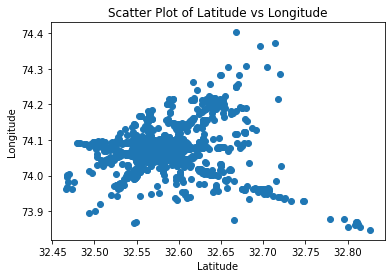

In [34]:
import matplotlib.pyplot as plt
plt.scatter(df['Latitude'], df['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude vs Longitude')
plt.show()

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Select the relevant columns for clustering
data = df[['Latitude', 'Longitude', 'Response Minutes']]

/home/muhammad/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [36]:
data

Latitude  Longitude  Response Minutes
23373  32.563886  74.125951              5.33
23375  32.562693  74.079824              0.38
23391  32.592410  74.046685             10.83
23392  32.534329  73.973791              5.15
23402  32.560744  74.048329              3.88
...          ...        ...               ...
43534  32.627704  74.078536              1.73
43537  32.592410  74.046685              6.82
43662  32.562241  74.078836              0.85
43702  32.592410  74.046685             11.52
43704  32.592410  74.046685              0.55

[3682 rows x 3 columns]

In [37]:
# Standardize the data to ensure all features contribute equally to the distance metric
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [38]:
# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)  # Trying different k values

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x793b7791b820>
Traceback (most recent call last):
  File "/home/muhammad/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/muhammad/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/muhammad/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/muhammad/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

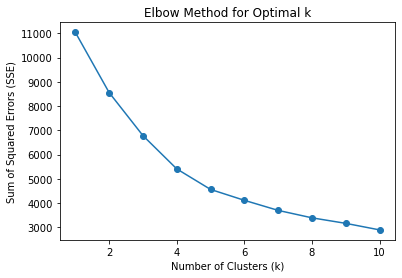

In [39]:
# Plot the Elbow Curve
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.savefig("Elbow Methods.pdf", format='pdf', dpi=300)  # Also save as PDF for vector quality
plt.show()

In [40]:
# Select the optimal k based on the Elbow method (e.g., if k=4 looks optimal)
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

/tmp/ipykernel_9769/3740520908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(data_scaled)


In [41]:
# Extract cluster centers and reverse scale them to interpret in the original scale
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

In [42]:
# Create a DataFrame with cluster centers for easier interpretation
centers_df = pd.DataFrame(cluster_centers, columns=['Latitude', 'Longitude', 'Response Time (Seconds)'])
centers_df['Response Time (Minutes)'] = centers_df['Response Time (Seconds)'] / 60

print("Cluster Centers:\n", centers_df)

Cluster Centers:
     Latitude  Longitude  Response Time (Seconds)  Response Time (Minutes)
0  32.600962  74.045293                 7.850824                 0.130847
1  32.640334  74.197057                 6.205179                 0.103420
2  32.565898  74.071936                 3.707195                 0.061787
3  32.573894  74.097011                 7.843469                 0.130724
4  32.523583  74.041246                 7.020199                 0.117003
5  32.583326  74.068675                18.878140                 0.314636
6  32.593261  74.050161                 2.874888                 0.047915
7  32.718784  73.940074                 6.130172                 0.102170


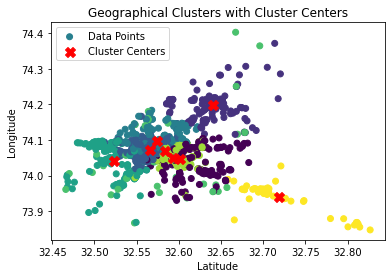

In [43]:
# Plot clusters with cluster centers
plt.scatter(df['Latitude'], df['Longitude'], c=df['Cluster'], cmap='viridis', label='Data Points')
plt.scatter(centers_df['Latitude'], centers_df['Longitude'], color='red', marker='X', s=100, label='Cluster Centers')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Geographical Clusters with Cluster Centers')
plt.show()

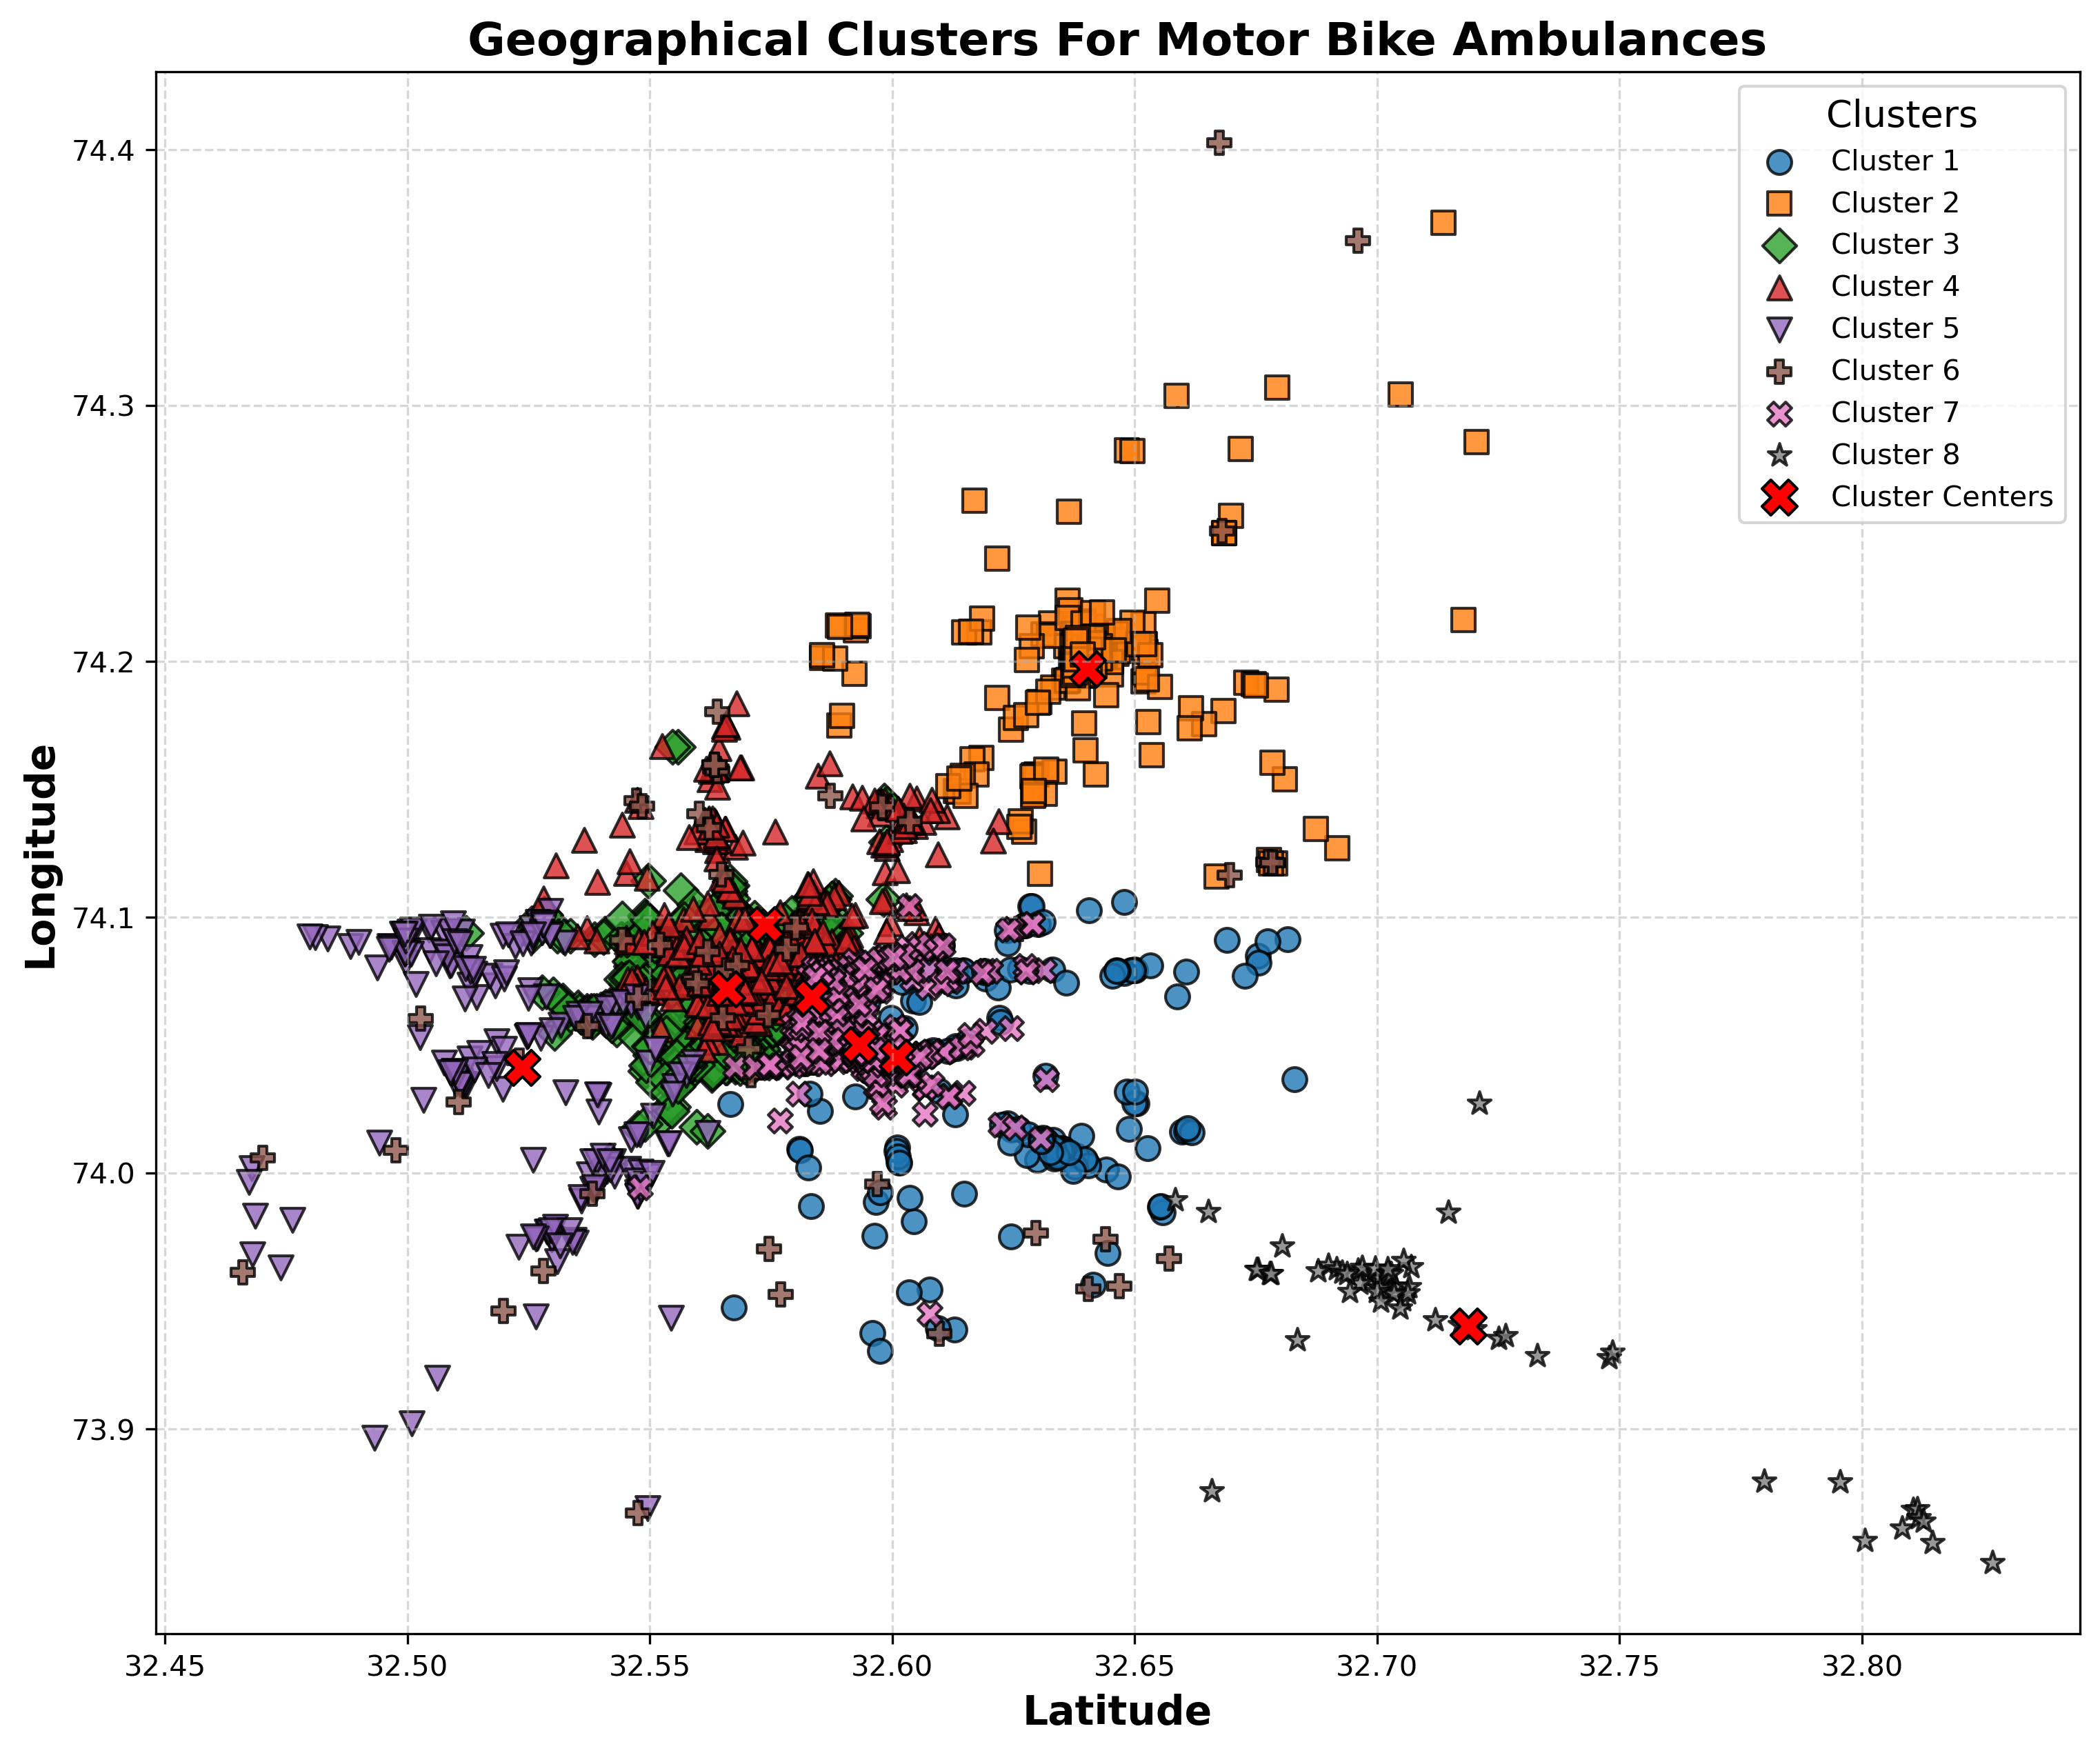

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define unique markers for each cluster
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', 'h', 'd']

# Create a high-resolution plot with increased DPI for print quality
plt.figure(figsize=(12, 10), dpi=300)  # Set a larger DPI for high-resolution output

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Latitude'], 
        cluster_data['Longitude'], 
        marker=markers[cluster_id % len(markers)],  # Cycle through markers if needed
        label=f'Cluster {cluster_id + 1}',
        s=70,    # Increase marker size for better visibility
        alpha=0.8,  # Set a higher alpha for better print contrast
        edgecolor='black'  # Add edge color to enhance visibility in print
    )

# Plot the cluster centers with a distinct larger red 'X' marker
plt.scatter(
    centers_df['Latitude'], 
    centers_df['Longitude'], 
    color='red', 
    marker='X', 
    s=150,   # Larger marker for cluster centers
    label='Cluster Centers',
    edgecolor='black'  # Add edge color to center points
)

# Additional plot styling for print clarity
plt.xlabel('Latitude', fontsize=14, fontweight='bold')
plt.ylabel('Longitude', fontsize=14, fontweight='bold')
plt.title('Geographical Clusters For Motor Bike Ambulances', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=10, title='Clusters', title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot as a high-resolution image
# plt.savefig("high_res_clusters.png", format='png', dpi=300)  # Save as PNG with high DPI
plt.savefig("high_res_clusters.pdf", format='pdf', dpi=300)  # Also save as PDF for vector quality

plt.show()


In [47]:
import folium
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Add dot markers for each point
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  # size of the dot
        color='black',  # border color of the dot
        fill=True,
        fill_color='red',  # fill color of the dot
        fill_opacity=0.7,  # fill opacity
        popup=f"Latitude: {row['Latitude']}, Longitude: {row['Longitude']}"
    ).add_to(m)

# Display the map
m.save("map.html")

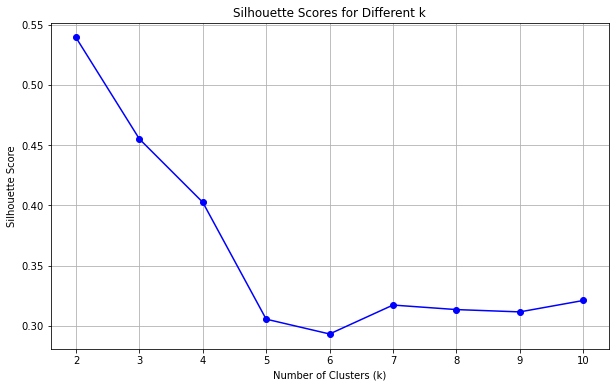

Optimal k based on silhouette score: 2


/tmp/ipykernel_8385/3713176574.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(data_scaled)


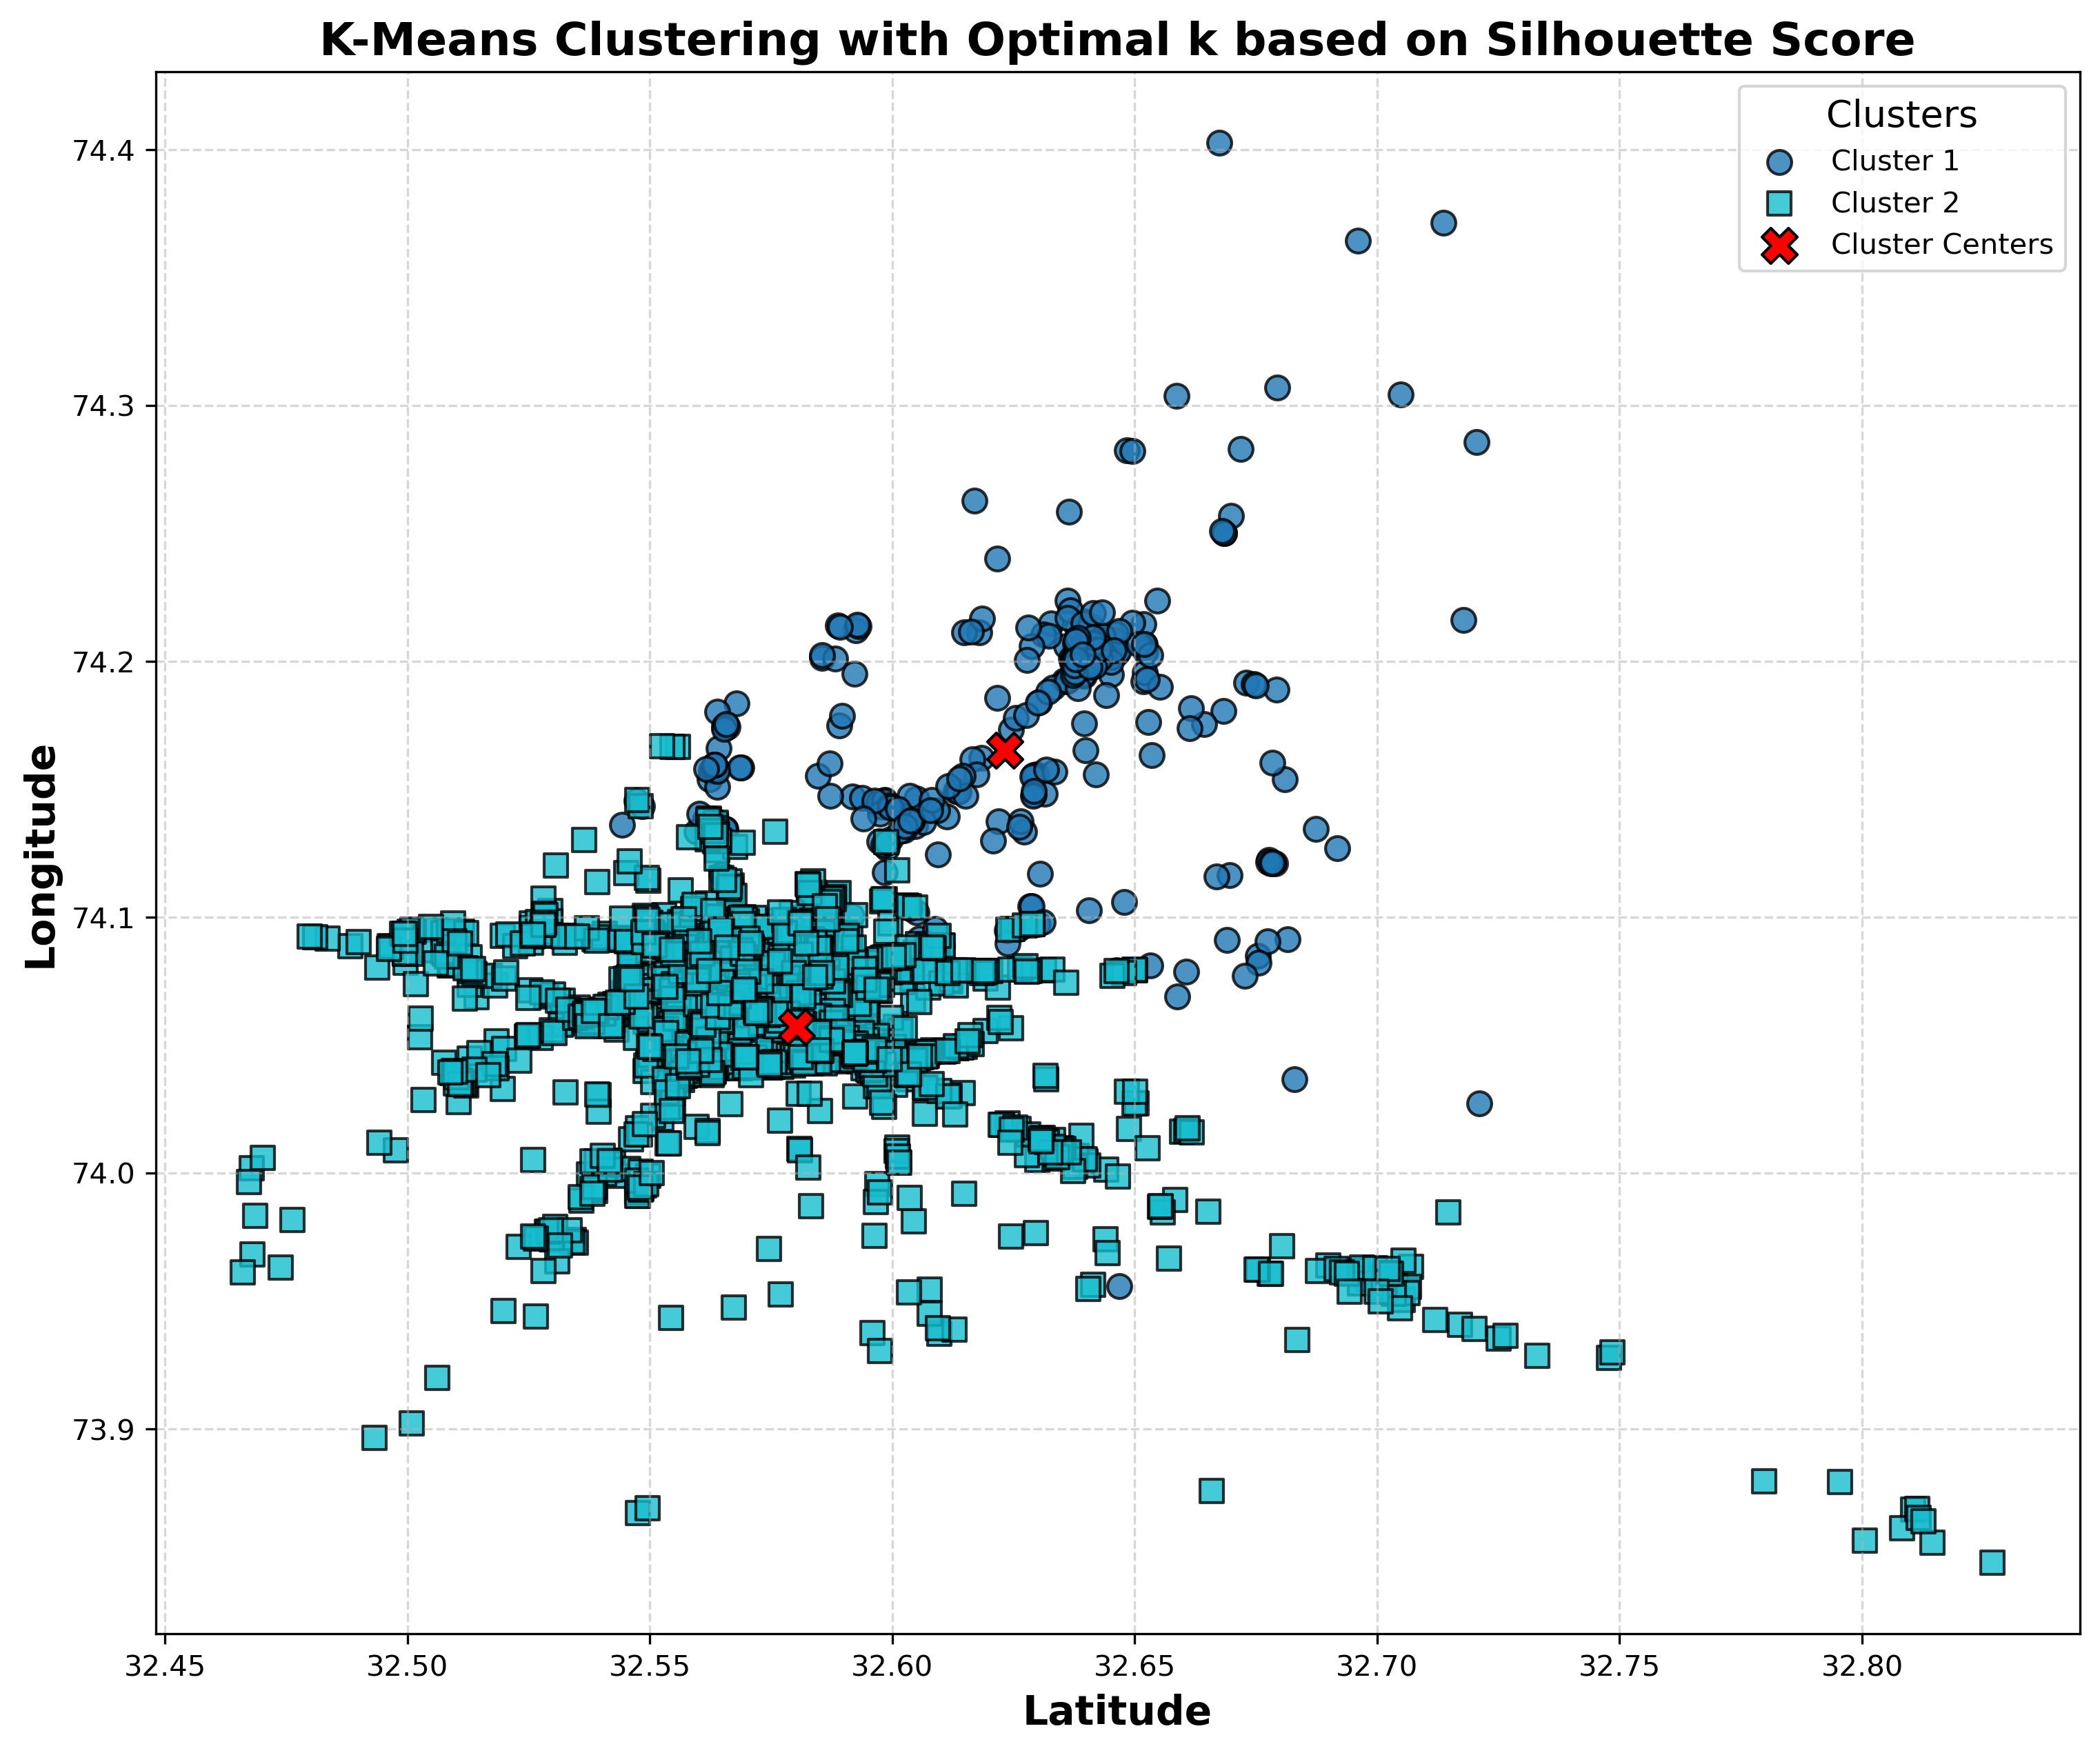

Cluster Centers:
     Latitude  Longitude  Response Time (Seconds)  Response Time (Minutes)
0  32.623195  74.165117               521.570513                 8.692842
1  32.580316  74.057155               292.591395                 4.876523


In [181]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
data = df[['Latitude', 'Longitude', 'Response Time (Seconds)']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Calculate silhouette scores for a range of k values
silhouette_scores = []
k_range = range(2, 11)  # Test k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to observe the optimal k visually
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.grid(True)
plt.show()

# Select the optimal k based on the maximum silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal k based on silhouette score: {optimal_k}")

# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Get cluster centers and inverse-transform to original scale for interpretation
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

# Create DataFrame for cluster centers
centers_df = pd.DataFrame(cluster_centers, columns=['Latitude', 'Longitude', 'Response Time (Seconds)'])
centers_df['Response Time (Minutes)'] = centers_df['Response Time (Seconds)'] / 60

# High-resolution plot with distinct markers
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', 'h', 'd']  # Define markers for up to 10 clusters
colors = plt.cm.get_cmap('tab10', optimal_k)

plt.figure(figsize=(12, 10), dpi=300)

# Plot each cluster with distinct markers and colors
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(
        cluster_data['Latitude'], 
        cluster_data['Longitude'], 
        marker=markers[i % len(markers)],  # Cycle markers if k > len(markers)
        color=colors(i),  # Color for each cluster
        s=70, 
        alpha=0.8,
        edgecolor='black',
        label=f'Cluster {i + 1}'
    )

# Plot cluster centers
plt.scatter(
    centers_df['Latitude'], 
    centers_df['Longitude'], 
    color='red', 
    marker='X', 
    s=150, 
    label='Cluster Centers',
    edgecolor='black'
)

# Styling and labels
plt.xlabel('Latitude', fontsize=14, fontweight='bold')
plt.ylabel('Longitude', fontsize=14, fontweight='bold')
plt.title('K-Means Clustering with Optimal k based on Silhouette Score', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=10, title='Clusters', title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.5)

# Save high-resolution plot
plt.savefig("kmeans_silhouette_optimal_clusters.png", format='png', dpi=300)
plt.savefig("kmeans_silhouette_optimal_clusters.pdf", format='pdf', dpi=300)

plt.show()

print("Cluster Centers:\n", centers_df)


/tmp/ipykernel_8385/3594601972.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = dbscan.fit_predict(data_scaled)


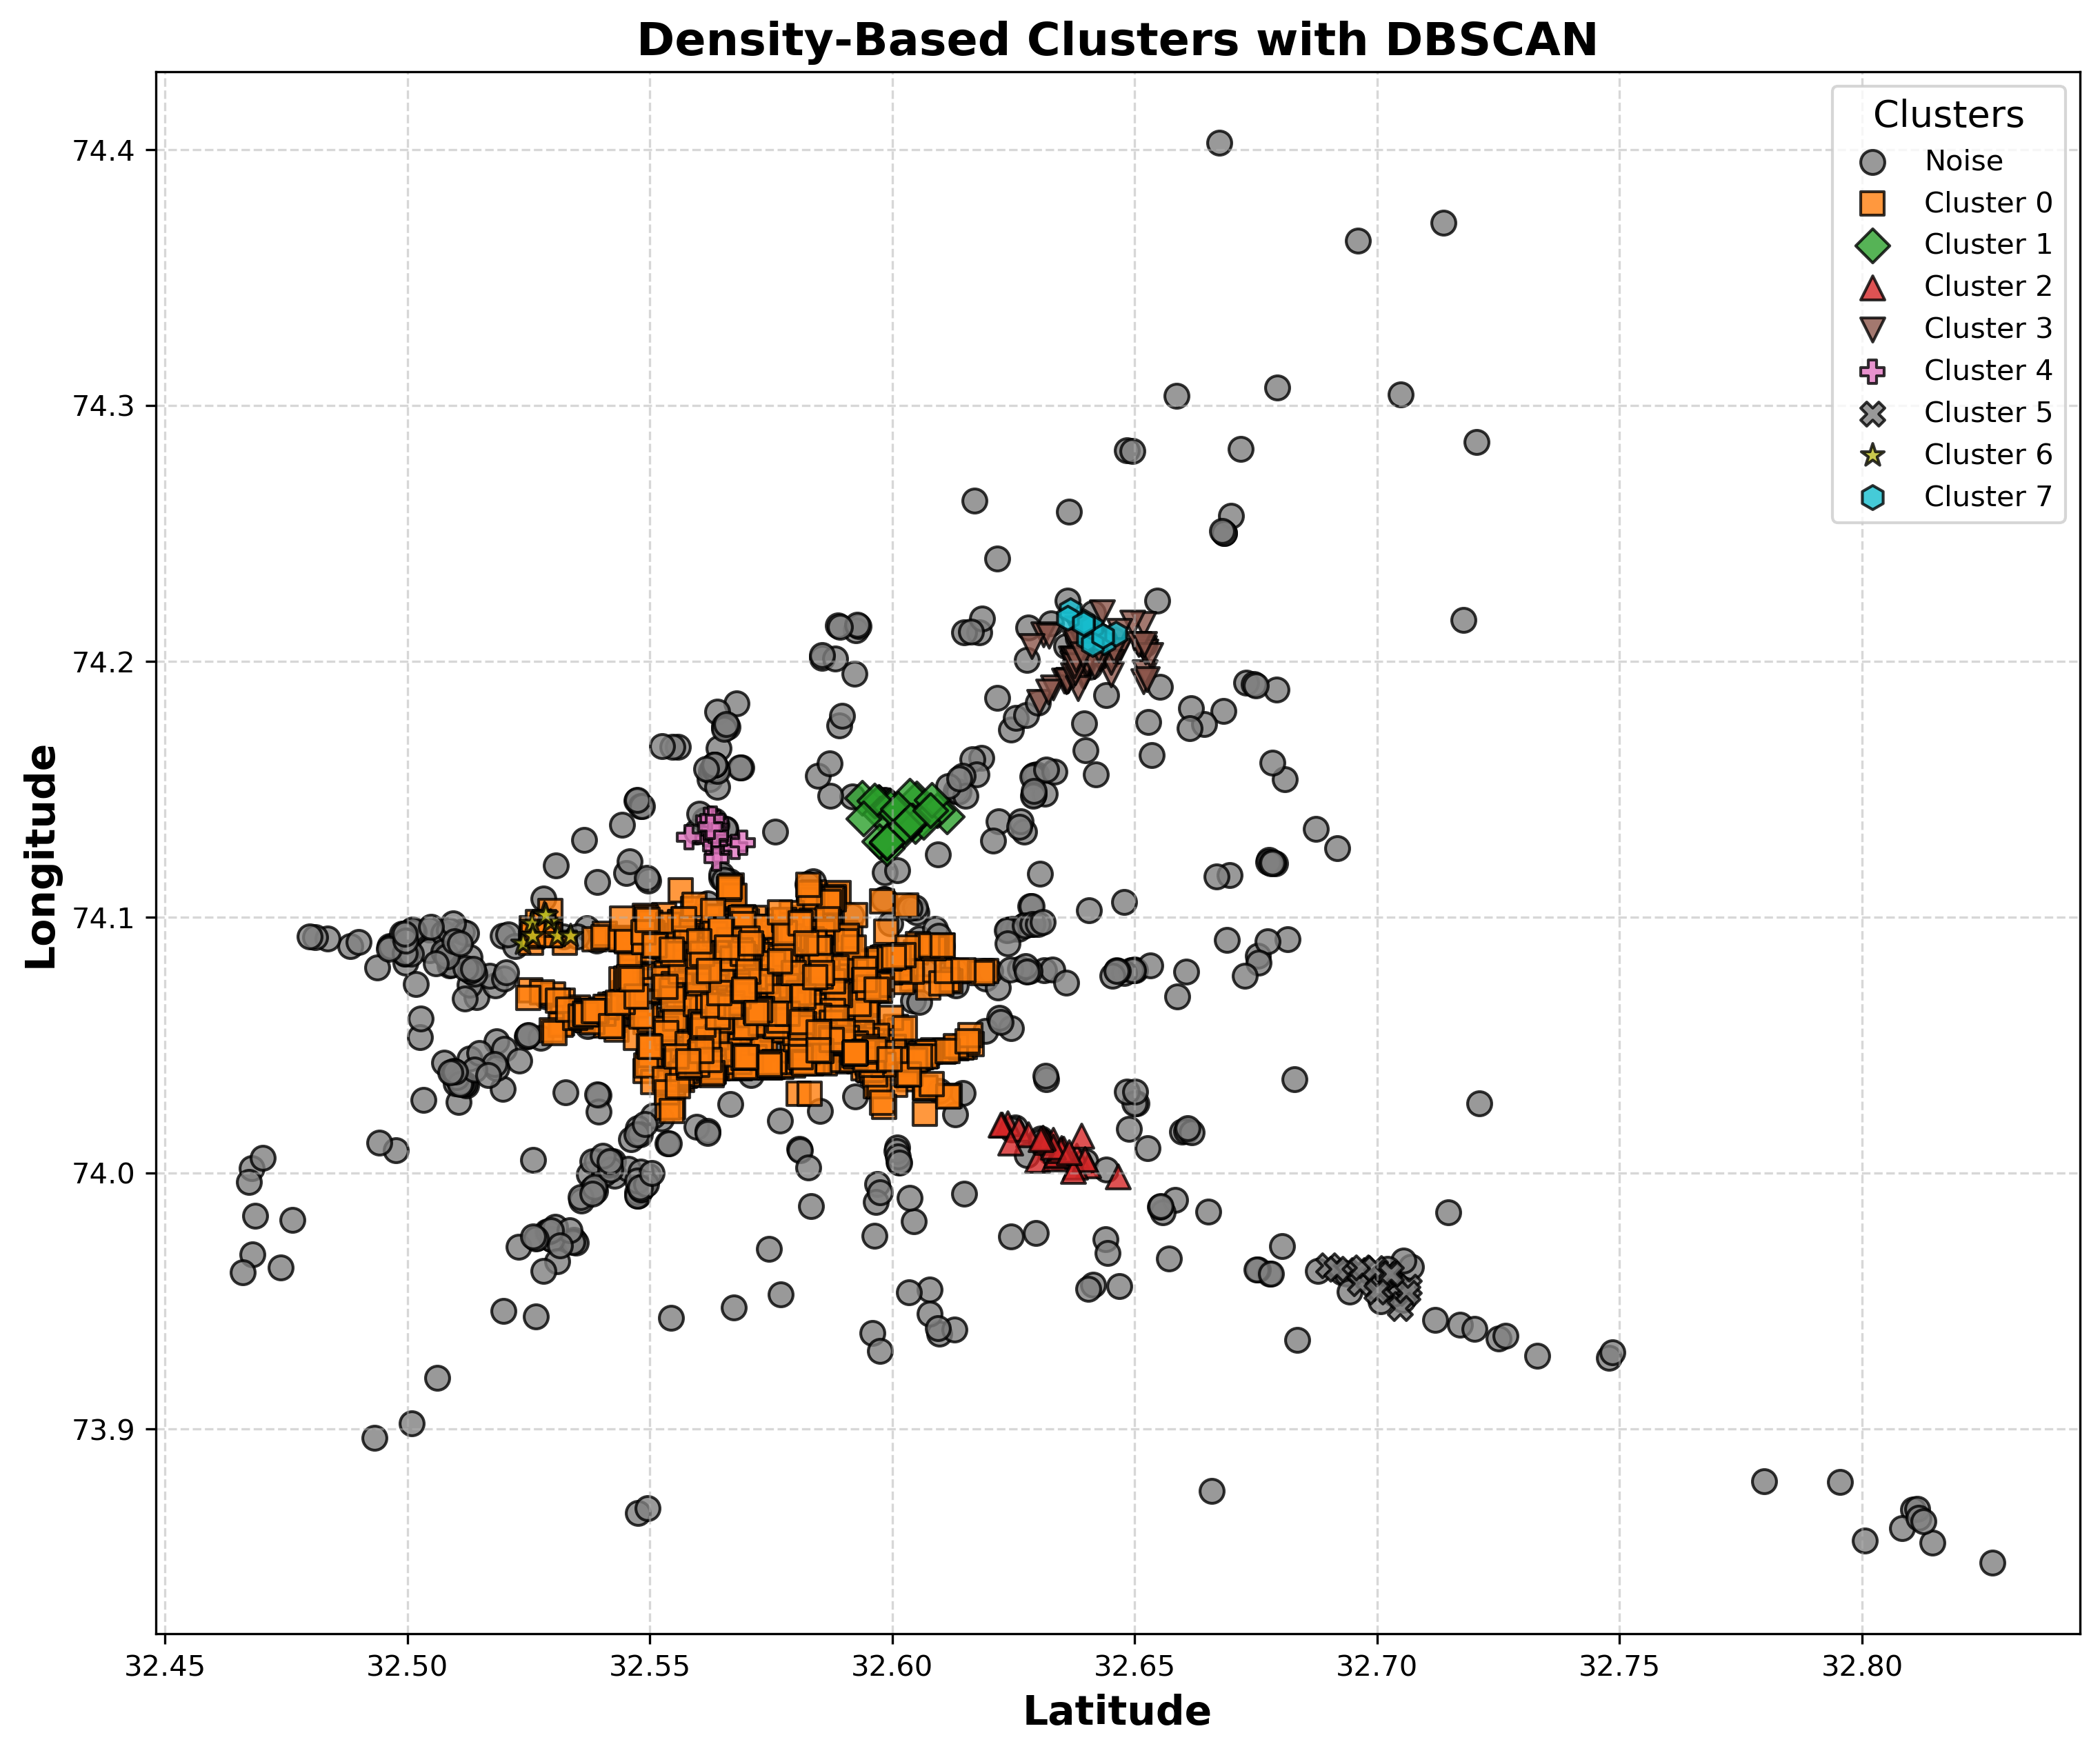

In [190]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize data for DBSCAN clustering
data = df[['Latitude', 'Longitude', 'Response Time (Seconds)']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust `eps` and `min_samples` as needed for your data
df['Cluster'] = dbscan.fit_predict(data_scaled)

# Extract cluster labels and identify unique clusters
unique_clusters = np.unique(df['Cluster'])

# Define unique markers for clusters (up to 10)
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', 'h', 'd']
colors = plt.cm.get_cmap('tab10', len(unique_clusters))  # Distinct colors for each cluster

# High-resolution plot setup
plt.figure(figsize=(12, 10), dpi=300)

# Plot each cluster with unique markers and colors
for i, cluster_id in enumerate(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Latitude'], 
        cluster_data['Longitude'],
        color=colors(i) if cluster_id != -1 else 'gray',  # Gray color for noise
        marker=markers[i % len(markers)],  # Cycle through markers
        s=70,
        alpha=0.8,
        edgecolor='black',
        label=f'Cluster {cluster_id}' if cluster_id != -1 else 'Noise'
    )

# Plot styling for readability
plt.xlabel('Latitude', fontsize=14, fontweight='bold')
plt.ylabel('Longitude', fontsize=14, fontweight='bold')
plt.title('Density-Based Clusters with DBSCAN', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=10, title='Clusters', title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.5)

# Save high-resolution plots
plt.savefig("dbscan_high_res_clusters.png", format='png', dpi=300)  # PNG for bitmap
plt.savefig("dbscan_high_res_clusters.pdf", format='pdf', dpi=300)  # PDF for vector quality

plt.show()


In [191]:
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select spatial data
spatial_data = df[['Latitude', 'Longitude']]

# Standardize the data
scaler = StandardScaler()
spatial_data_scaled = scaler.fit_transform(spatial_data)

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust `eps` and `min_samples` as needed
df['Cluster'] = dbscan.fit_predict(spatial_data_scaled)

# Initialize a Folium map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
folium_map = folium.Map(location=map_center, zoom_start=12, tiles='stamentoner')

# Define a custom motorbike ambulance icon URL
motorbike_icon_url = 'https://img.icons8.com/ios-filled/50/000000/motorbike.png'  # Replace with preferred icon URL

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(folium_map)

# Add each cluster point to the map
for _, row in df.iterrows():
    if row['Cluster'] != -1:  # Only plot clustered points, ignore noise points (-1)
        # Add marker with custom motorbike icon
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            icon=folium.CustomIcon(motorbike_icon_url, icon_size=(30, 30)),  # Custom motorbike icon
            popup=f'Cluster: {row["Cluster"]}'
        ).add_to(marker_cluster)

# Display the map
folium_map.save("motorbike_cluster_map.html")  # Save as HTML file for viewing in a browser
folium_map


/tmp/ipykernel_8385/2012205005.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = dbscan.fit_predict(spatial_data_scaled)
